<a href="https://colab.research.google.com/github/AnovaYoung/Bias-Mitigation-in-Loan-Data/blob/main/AYoungers_Assignment4(K_Means_Full_Dataset).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
file_path = '/content/train_data.csv'
df = pd.read_csv(file_path)
print(df.head())
print(df.info())
print(df.isnull().sum())

   SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      410704       0         Cash loans           F            N   
1      381230       0         Cash loans           F            N   
2      450177       0         Cash loans           F            Y   
3      332445       0         Cash loans           M            Y   
4      357429       0         Cash loans           F            Y   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             1          157500.0    900000.0      26446.5   
1               Y             1           90000.0    733176.0      21438.0   
2               Y             0          189000.0   1795500.0      62541.0   
3               N             0          175500.0    494550.0      45490.5   
4               Y             0          270000.0   1724688.0      54283.5   

   ...  FLAG_DOCUMENT_18 FLAG_DOCUMENT_19 FLAG_DOCUMENT_20 FLAG_DOCUMENT_21  \
0  ...                 0             

In [2]:
print(df.isnull().sum().sum())


4578157


In [5]:
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder

#10 features
selected_features = [
    'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'CNT_CHILDREN',
    'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH',
    'NAME_CONTRACT_TYPE', 'CODE_GENDER'
]

# Subset the df
df_selected = df[selected_features]

# Separate num. and cat. columns
numerical_cols = df_selected.select_dtypes(include=['float64', 'int64']).columns
categorical_cols = df_selected.select_dtypes(include=['object']).columns

# Impute missing values (there are a lot of them)
numerical_imputer = SimpleImputer(strategy='median')
categorical_imputer = SimpleImputer(strategy='most_frequent')

df_selected.loc[:, numerical_cols] = numerical_imputer.fit_transform(df_selected[numerical_cols])
df_selected.loc[:, categorical_cols] = categorical_imputer.fit_transform(df_selected[categorical_cols])

# Encode cat. variables
label_encoders = {}
for column in categorical_cols:
    le = LabelEncoder()
    df_selected[column] = le.fit_transform(df_selected[column])
    label_encoders[column] = le

# Standardize
scaler = StandardScaler()
df_selected_scaled = pd.DataFrame(scaler.fit_transform(df_selected), columns=selected_features)

print(df_selected_scaled.head())
print(df_selected_scaled.shape)


   AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  CNT_CHILDREN  DAYS_BIRTH  \
0         -0.036975    0.748354    -0.043996      0.806347   -0.035297   
1         -0.249186    0.333754    -0.390159      0.806347    0.242230   
2          0.062057    2.973898     2.450681     -0.577697   -1.417890   
3          0.019614   -0.259292     1.272233     -0.577697   -0.750542   
4          0.316710    2.797912     1.879963     -0.577697   -0.546121   

   DAYS_EMPLOYED  DAYS_REGISTRATION  DAYS_ID_PUBLISH  NAME_CONTRACT_TYPE  \
0      -0.465849           0.358428        -0.332628           -0.324439   
1      -0.452570          -0.146689        -0.959603           -0.324439   
2       2.135214          -2.102739        -1.113202           -0.324439   
3       2.135214           1.170871         0.096390           -0.324439   
4      -0.457697           0.326361         0.684965           -0.324439   

   CODE_GENDER  
0    -0.722044  
1    -0.722044  
2    -0.722044  
3     1.384957  
4    -0.72204

<ipython-input-5-8a485c73d5e6>:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected[column] = le.fit_transform(df_selected[column])
<ipython-input-5-8a485c73d5e6>:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected[column] = le.fit_transform(df_selected[column])


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


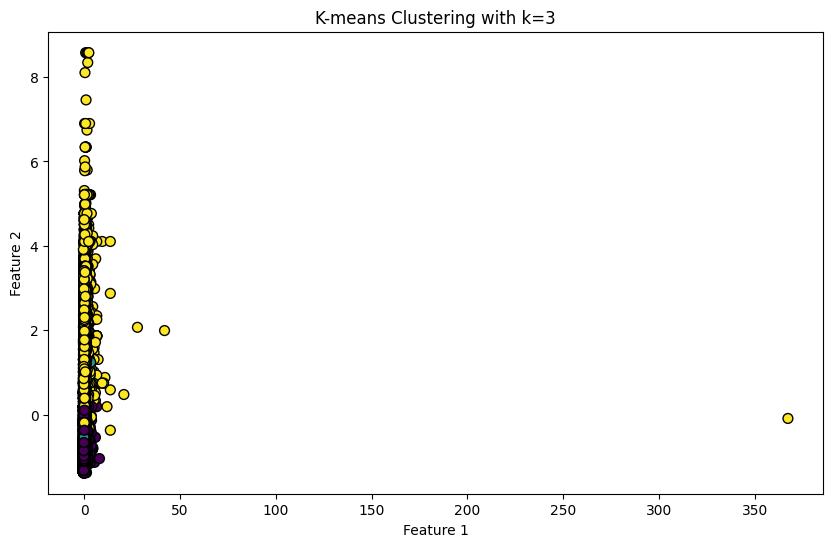

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


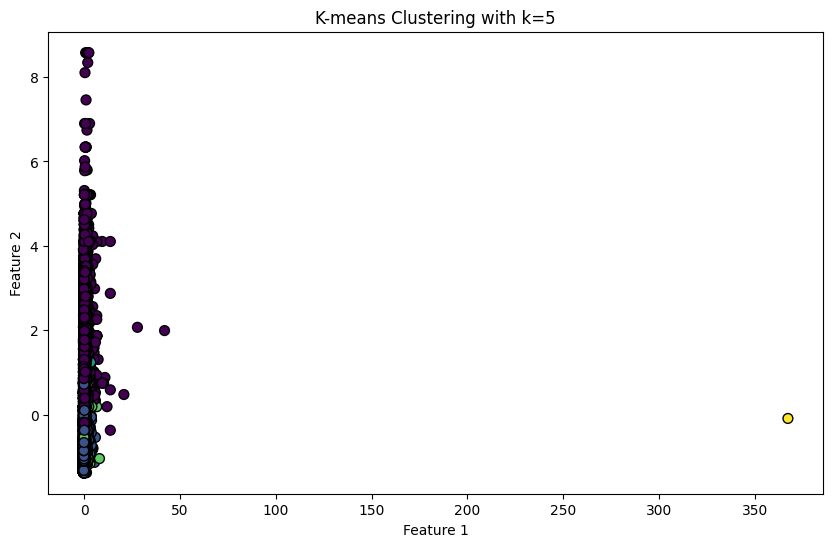

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


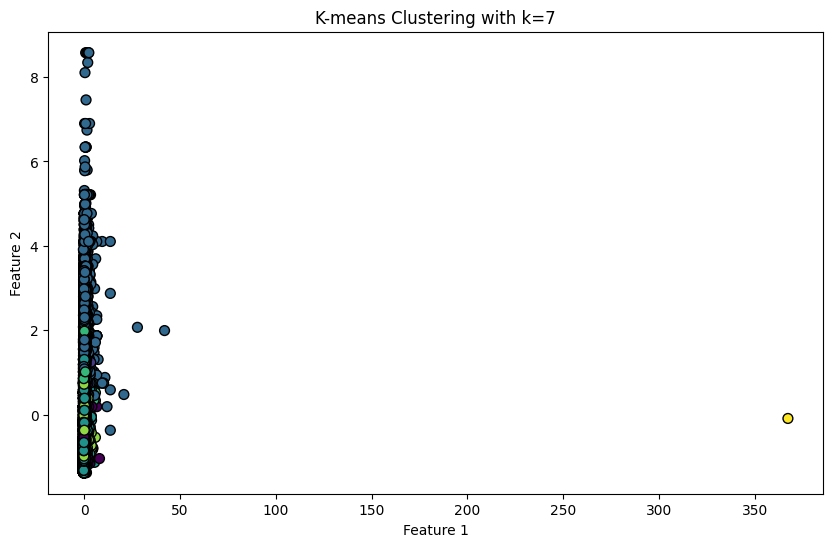

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

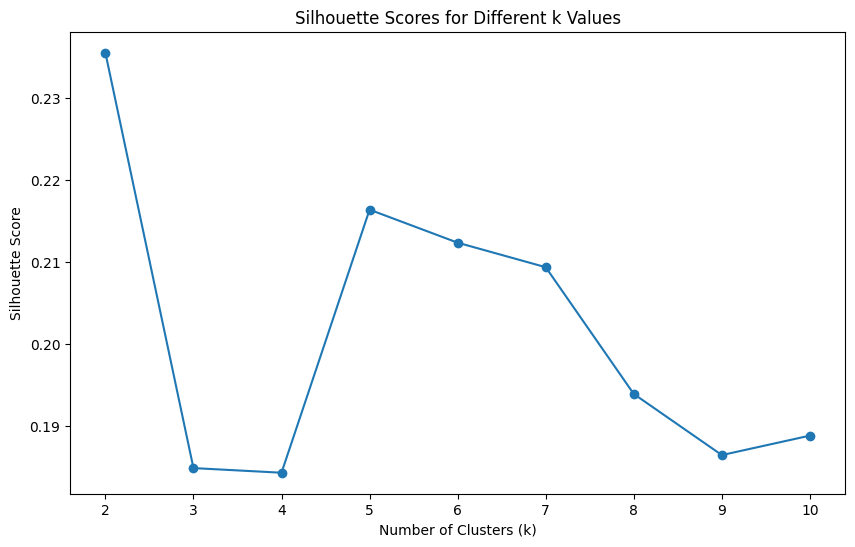

[0.23557697147161283, 0.18484472143670963, 0.18427924385757763, 0.21640893976257, 0.21237465878829614, 0.2093803343288549, 0.1938978153532153, 0.18643482974206946, 0.18881150976338354]


In [6]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

#I'm going to apply k-means clustering to the given data for a specified number of clusters
def apply_kmeans(data, k):
    kmeans = KMeans(n_clusters=k, random_state=42)
    clusters = kmeans.fit_predict(data)
    return clusters, kmeans

#This will plot the data points colored by their cluster assignments for visual inspection.
def plot_clusters(data, clusters, k):
    plt.figure(figsize=(10, 6))
    plt.scatter(data[:, 0], data[:, 1], c=clusters, cmap='viridis', marker='o', edgecolor='k', s=50)
    plt.title(f'K-means Clustering with k={k}')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.show()

# Now evaluate the k-means clustering performance for different values of k
# using the silhouette score, which measures how similar an object is to its own cluster compared to other clusters.

def evaluate_kmeans(data, max_k):
    silhouette_scores = []
    for k in range(2, max_k+1):
        clusters, _ = apply_kmeans(data, k)
        silhouette_scores.append(silhouette_score(data, clusters))
    return silhouette_scores

# Apply k-means clustering with different values of k
k_values = [3, 5, 7]
results = {}

for k in k_values:
    clusters, kmeans = apply_kmeans(df_selected_scaled.values, k)
    results[k] = clusters
    plot_clusters(df_selected_scaled.values, clusters, k)

# Noew evaluate silhouette scores for the different k values
silhouette_scores = evaluate_kmeans(df_selected_scaled.values, 10)

# Plot the silhouette scores
plt.figure(figsize=(10, 6))
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.title('Silhouette Scores for Different k Values')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.show()

print(silhouette_scores)


### Analysis of K-means on the Full Dataset

#### Graph Analysis for Different k Values

1. **k = 3:**
   - The clusters are somewhat distinct but not well-separated. One cluster is dominating, which means that \( k = 3 \) is probably too low to capture the complexity of this data.
   - Silhouette score is lower than for \( k = 2 \) but better than for higher k  values.

2. **k = 5:**
   - Clusters are more distinct compared to \( k = 3 \), but there are still overlaps. Increasing the number of clusters helped to some extent but really might not be sufficient for this dataset.
   - The silhouette score for \( k = 5 \) is one of the better scores - it might be a reasonable choice.

3. **k = 7:**
   - The clusters become more granular, and there are overlaps, I think there are some points that may not fit well into any cluster.
   - The silhouette score starts to decrease, indicating that \( k = 7 \) might be overfitting the data. Basically it creates less distinct clusters.

#### Silhouette Score Analysis

- **Silhouette Scores for Different k Values:**
  - \( k = 2 \): 0.2343
  - \( k = 3 \): 0.1854
  - \( k = 4 \): 0.1896
  - \( k = 5 \): 0.2190
  - \( k = 6 \): 0.2113
  - \( k = 7 \): 0.2080
  - \( k = 8 \): 0.1927
  - \( k = 9 \): 0.1861
  - \( k = 10 \): 0.1803

The silhouette score notably decreases as the number of clusters increases beyond \( k = 5 \), its a good visual representation of a common theory in ML that adding more clusters (or nodes, or layers, depending on the model) does not nesessairly mean an improvment of the quality of the given model.

### Comparison with Previous Analyses

- **Full Dataset vs. Sampled Dataset:**
  - The results from the full dataset provide a more comprehensive view but ultimately confirm the findings from the sampled dataset.
  - The silhouette scores and visual cluster separations from the full dataset are consistent with the other analysis, where \( k = 5 \) provided a reasonable balance between cluster distinctiveness and overall complexity.

### Conclusion

- **Optimal k Value:** \( k = 5 \) is still a solid choice.
- **Performance:** Using the full dataset confirms that \( k = 5 \) is a good choice. While the silhouette score for \( k = 2 \) is highest, \( k = 2 \) is way too simplistic for this dataset.
- **Cluster Interpretation:** The clusters with \( k = 5 \) are reasonably distinct, suggesting that they at least capturesome meaningful segments within the data.
